In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_10 = train_datagen.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_10_percent\train',
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

test_data_10 = test_datagen.flow_from_directory(r'D:\1jupyter\Datasets\10_food_classes_10_percent\test',
                                                target_size=IMAGE_SHAPE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [3]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f'saving Tensorboard log files to {log_dir}')
    return tensorboard_callback

In [4]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [5]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [6]:
def create_model(model_url, num_classes=10):
    feature_extractor_layer = hub.KerasLayer(model_url,trainable=False,name='feature_ex_layer',
                                             input_shape=IMAGE_SHAPE+(3,))
    
    model = tf.keras.Sequential()
    model.add(feature_extractor_layer)
    model.add(layers.Dense(units=num_classes,activation='softmax', name='output_layer'))
    
    return model

In [7]:
resnet_model = create_model(resnet_url,num_classes=train_data_10.num_classes)

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_ex_layer (KerasLayer (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [9]:
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer='Adam',
                     metrics=['accuracy'])

In [10]:
resnet_history = resnet_model.fit(train_data_10, 
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10),
                                  validation_data=test_data_10,
                                  validation_steps=len(test_data_10),
                                  callbacks=[create_tensorboard_callback(dir_name='tf_hub1', 
                                                                         experiment_name='resnet_model1')])

saving Tensorboard log files to tf_hub1/resnet_model120220722-174115
Epoch 1/5
24/24 [==============================] - 36s 1s/step - loss: 1.9457 - accuracy: 0.3747 - val_loss: 1.2547 - val_accuracy: 0.6116
Epoch 2/5
24/24 [==============================] - 14s 588ms/step - loss: 0.9361 - accuracy: 0.7240 - val_loss: 0.9179 - val_accuracy: 0.6916
Epoch 3/5
24/24 [==============================] - 14s 609ms/step - loss: 0.6433 - accuracy: 0.8187 - val_loss: 0.7995 - val_accuracy: 0.7364
Epoch 4/5
24/24 [==============================] - 14s 609ms/step - loss: 0.4896 - accuracy: 0.8667 - val_loss: 0.7416 - val_accuracy: 0.7580
Epoch 5/5
24/24 [==============================] - 14s 588ms/step - loss: 0.3920 - accuracy: 0.9080 - val_loss: 0.6985 - val_accuracy: 0.7676


In [11]:
import pandas as pd
loss_df_resnet = pd.DataFrame(resnet_history.history)

<AxesSubplot:>

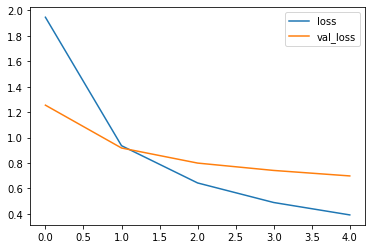

In [12]:
loss_df_resnet[['loss','val_loss']].plot()

<AxesSubplot:>

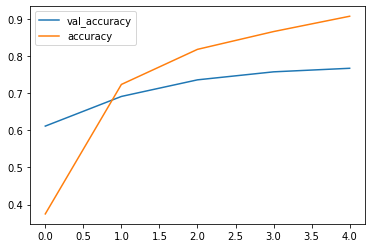

In [13]:
loss_df_resnet[['val_accuracy','accuracy']].plot()

In [14]:
efficient_model = create_model(efficientnet_url,num_classes=train_data_10.num_classes)

In [15]:
efficient_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_ex_layer (KerasLayer (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [16]:
efficient_model.compile(loss='categorical_crossentropy',
                        optimizer='Adam',
                        metrics=['accuracy'])

In [17]:
efficient_history = efficient_model.fit(train_data_10,epochs=5,
                                        #steps_per_epoch=(len(train_data_10)/2),
                                        validation_data=train_data_10,
                                        #validation_steps=(len(test_data_10)/2),
                                        callbacks=[create_tensorboard_callback(dir_name='tf_hub2', 
                                                                               experiment_name='efficient_model1')])

saving Tensorboard log files to tf_hub2/efficient_model120220722-174317
Epoch 1/5
24/24 [==============================] - 40s 1s/step - loss: 1.7853 - accuracy: 0.4800 - val_loss: 1.2540 - val_accuracy: 0.7587
Epoch 2/5
24/24 [==============================] - 4s 179ms/step - loss: 1.0360 - accuracy: 0.7973 - val_loss: 0.8253 - val_accuracy: 0.8373
Epoch 3/5
24/24 [==============================] - 4s 175ms/step - loss: 0.7452 - accuracy: 0.8360 - val_loss: 0.6371 - val_accuracy: 0.8720
Epoch 4/5
24/24 [==============================] - 4s 180ms/step - loss: 0.5970 - accuracy: 0.8733 - val_loss: 0.5273 - val_accuracy: 0.8947
Epoch 5/5
24/24 [==============================] - 4s 176ms/step - loss: 0.5060 - accuracy: 0.8920 - val_loss: 0.4538 - val_accuracy: 0.9080
